# Exam Machine Learning - Matteo Fusconi - 2023/01/09
matteo.fusconi4@studio.unibo.it\
0001103421

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
rand_state = 42

np.random.seed(rand_state)

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots

In [64]:
url = "income.csv"
separator = ","
columns = ["Index", "Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]


df0 = pd.read_csv(url, sep= separator, names= columns, index_col= "Index")

df0.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,,
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [43]:
N, D_ = df0.shape
target = "Rings"
print(f"This dataset has {N} examples of {D_ - 1} attributes plus the target '{target}'")


This dataset has 4177 examples of 8 attributes plus the target 'Rings'


In [44]:
print("Short description of the numeric attributes:\n")

df0.describe()

Short description of the numeric attributes:



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


In [45]:
print("Short description of the cathegorical attribute\n")

df0.describe(include= "O")

Short description of the cathegorical attribute



,Sex
count,4177
unique,3
top,M
freq,1528


In [69]:
# It is necessary to convert the nominal attribute to a numeric one
ohe = OneHotEncoder(handle_unknown= "ignore", sparse= False)
sex = ohe.fit_transform(df0[["Sex"]])
sex_df = pd.DataFrame(sex, columns= df0["Sex"].unique())
sex_df["Index"] = sex_df.index

df1 = df0.drop("Sex", axis= 1).merge(sex_df, on= "Index").set_index("Index")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
Index,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0,0.0,0.0,1.0
1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.0700,0.0,0.0,0.0,1.0
2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.2100,1.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,NaN,1.0,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0,1.0


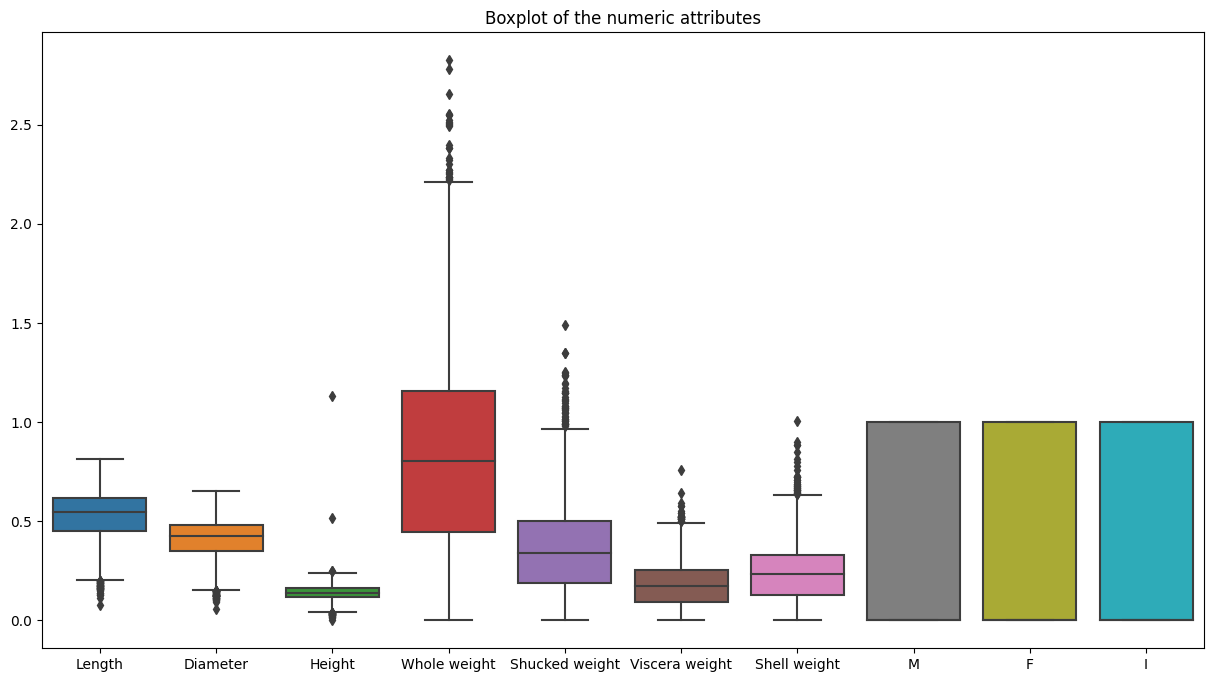

In [48]:
plt.figure(figsize= (15, 8))
plt.title("Boxplot of the numeric attributes")
sns.boxplot(df1.drop(target, axis= 1))
plt.show()

Pairplot of the Data with color palette baset on target Rings


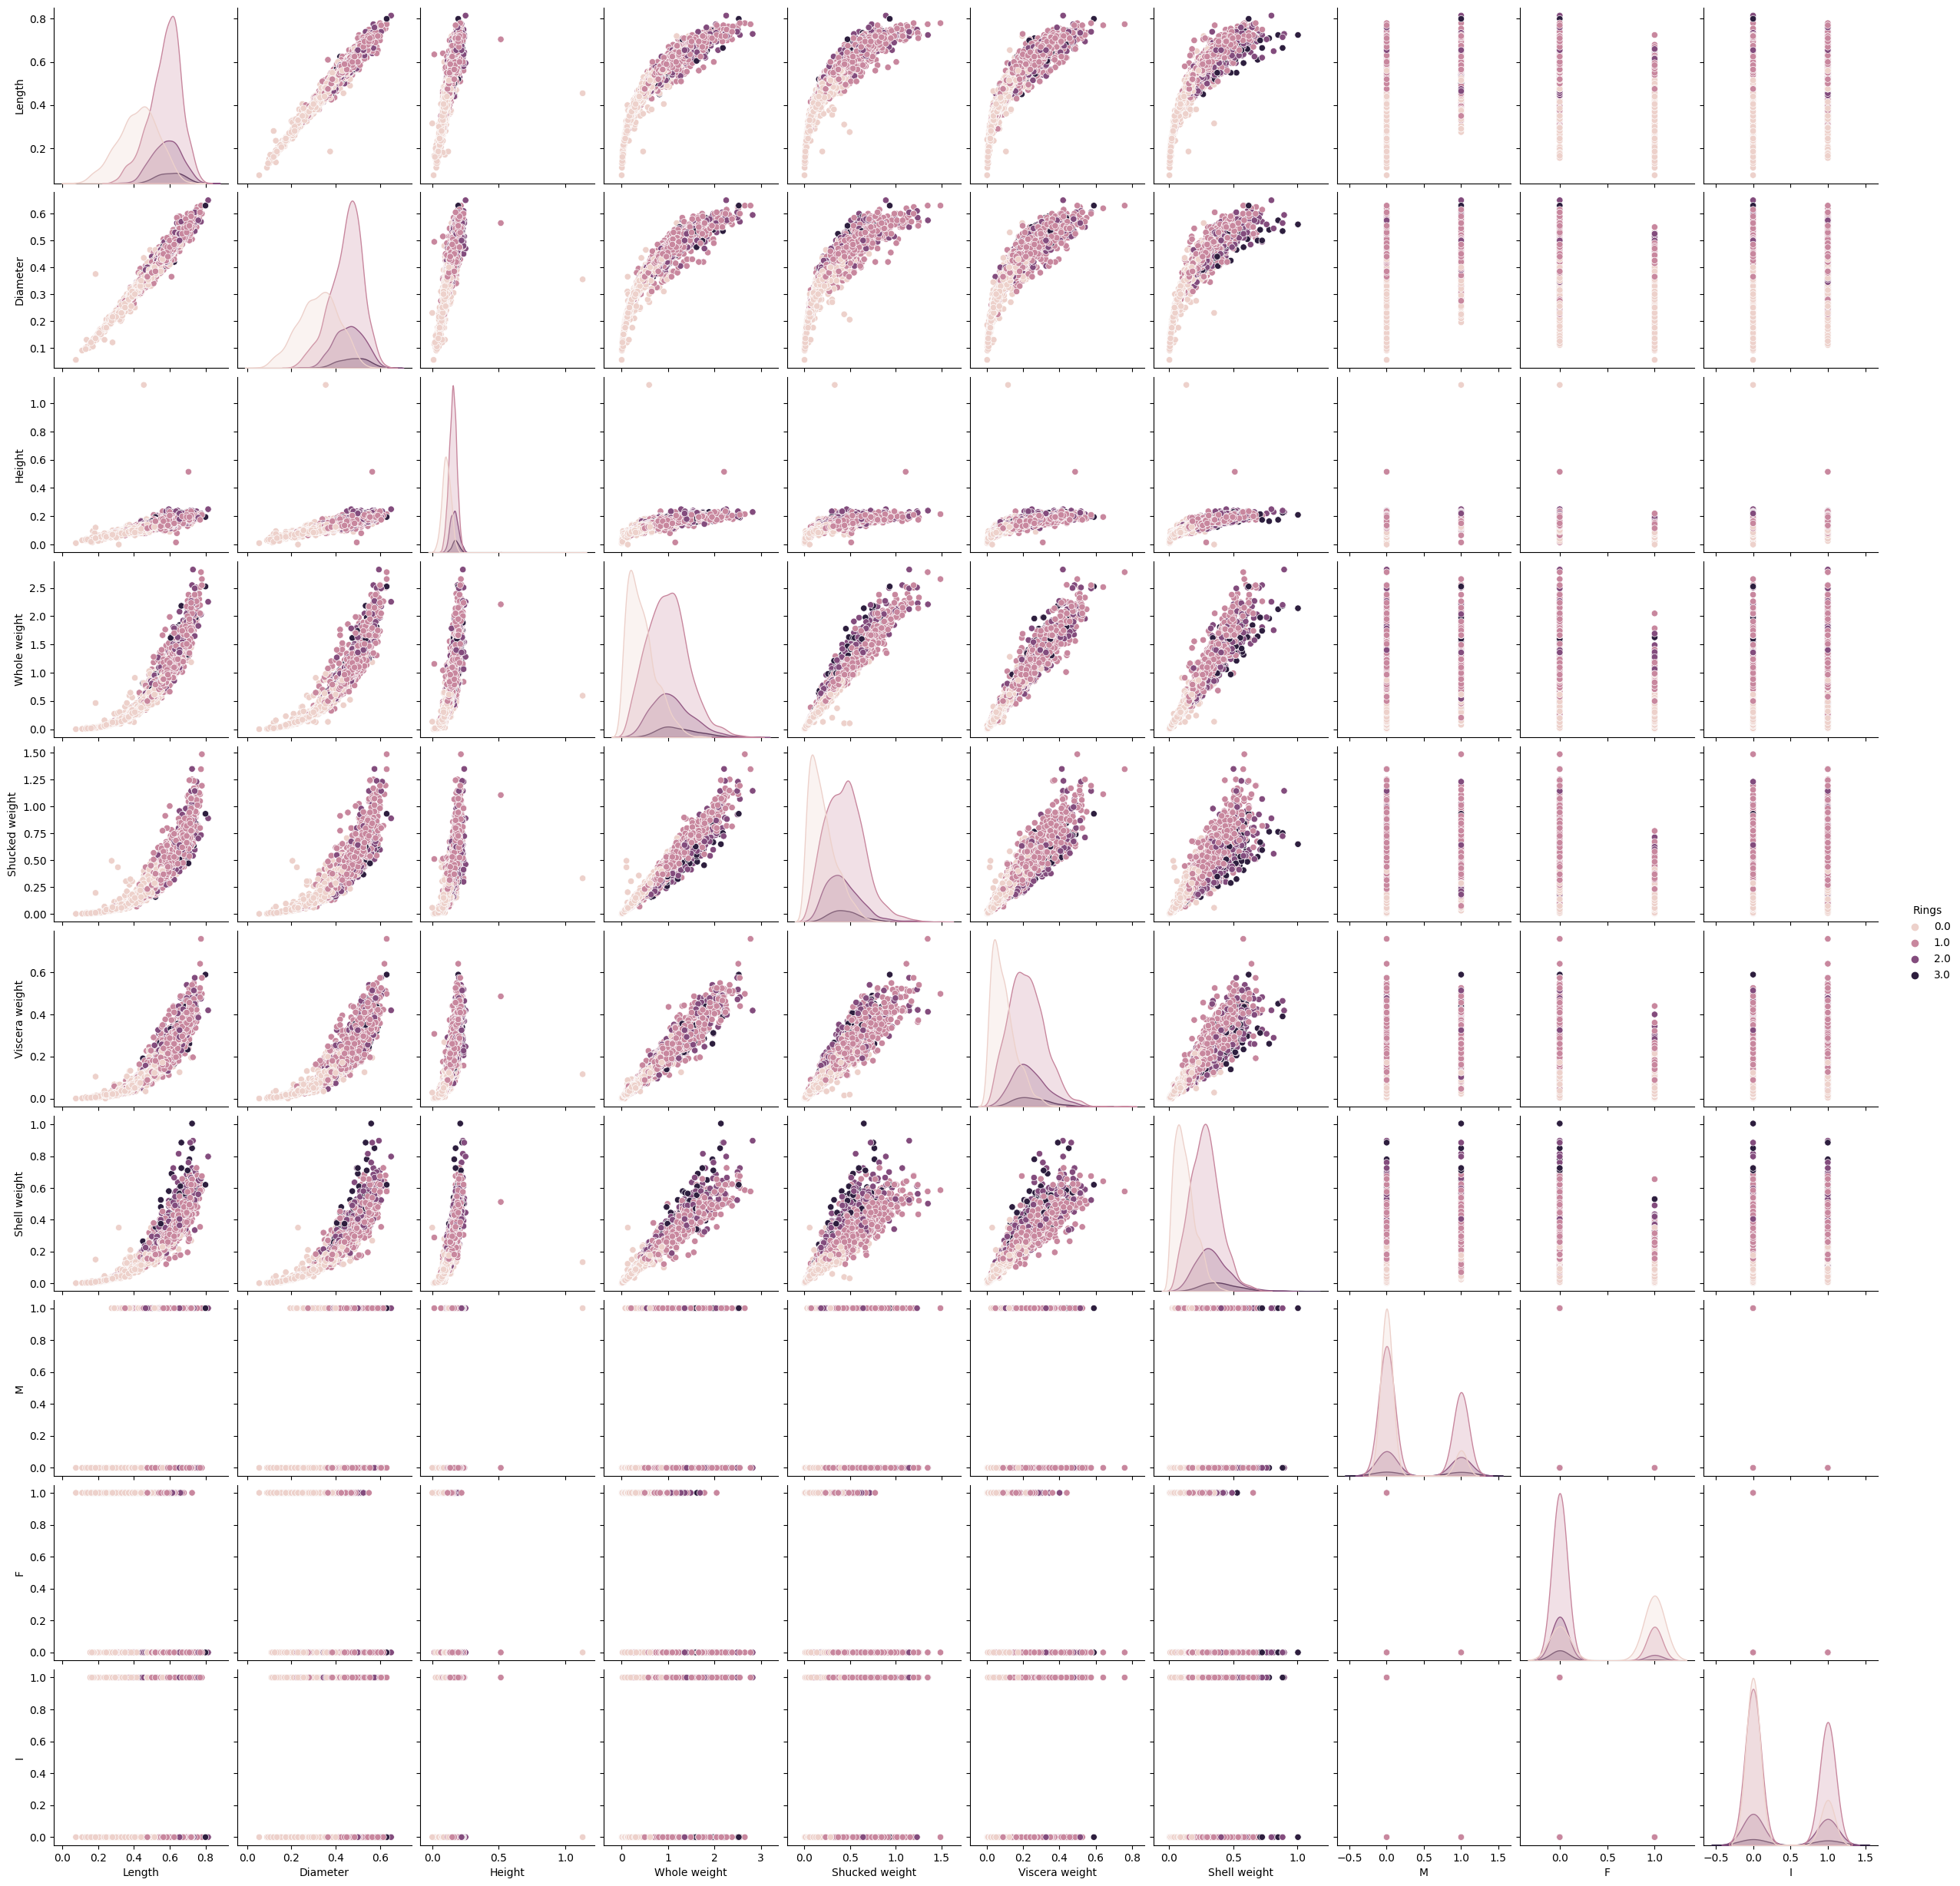

In [49]:
print(f"Pairplot of the Data with color palette baset on target {target}")
sns.pairplot(df1, hue= target)
plt.show()

2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

This is a supervised dataset composed of the target "Rings", which has 4 distinct values (4 classes). Then it has 7 numeric attributes of type Ratio and a cathegorical attribute of type Nominal.

All the numeric distributions present outliers, and the distributions are quite balanced.

3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that.
Deal with missing values, if any

I don't drop any column because every column seems as useful to the classification process

In [50]:
if df1.isna().any().any():
    print("The dataset has missing values")
    
    df = df1.dropna()
    
    N, D_ = df.shape
    print(f"The dataset without missing values has {N} examples")
    
else:
    df = df1

The dataset has missing values
The dataset without missing values has 3052 examples


4. find the best classification scheme considering two classification methods,
find the best hyperparameters using cross validation; the optimization
must be focused on the f1_macro measure

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
X = df.drop(target, axis= 1)
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 2/3)

params_dt = {"max_depth": [*range(1, 25)]}
params_rf = {"max_depth": [*range(5,14)], "n_estimators":[*range(10,50,10)]}

In [53]:
# Decision Trees
gscv_dt = GridSearchCV(DecisionTreeClassifier(random_state= rand_state), param_grid= params_dt, scoring= "f1_macro")

gscv_dt.fit(Xtrain, ytrain)

print("Best parameters for Decision Tree Classifier")
print(gscv_dt.best_params_)

y_dt = gscv_dt.predict(Xtest)

Best parameters for Decision Tree Classifier
{'max_depth': 10}


In [54]:
# Random Forest
gscv_rf = GridSearchCV(RandomForestClassifier(random_state= rand_state), param_grid= params_rf, scoring= "f1_macro")

gscv_rf.fit(Xtrain, ytrain)

print("Best parameters for Random Forest")
print(gscv_rf.best_params_)

y_rf = gscv_rf.predict(Xtest)

Best parameters for Random Forest
{'max_depth': 13, 'n_estimators': 40}


5. Show the performance measures and the confusion matrices for the best
hyperparameters of each model

In [55]:
print("Classification Report for DecisionTreeClassifier:\n")
print(classification_report(y_pred= y_dt, y_true= ytest))

print("Confusion Matrix for DecisionTreeClassifier:\n")
print(confusion_matrix(y_pred= y_dt, y_true= ytest))

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       302
         1.0       0.65      0.74      0.70       487
         2.0       0.50      0.39      0.44       191
         3.0       0.11      0.05      0.07        38

    accuracy                           0.66      1018
   macro avg       0.51      0.49      0.49      1018
weighted avg       0.64      0.66      0.64      1018

Confusion Matrix for DecisionTreeClassifier:

[[228  70   4   0]
 [ 60 362  57   8]
 [  8 100  75   8]
 [  0  22  14   2]]


In [56]:
print("Classification Report for RandomForest:\n")
print(classification_report(y_pred= y_rf, y_true= ytest))

print("Confusion Matrix for RandomForest:\n")
print(confusion_matrix(y_pred= y_rf, y_true= ytest))

Classification Report for RandomForest:

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76       302
         1.0       0.67      0.81      0.73       487
         2.0       0.58      0.40      0.47       191
         3.0       0.00      0.00      0.00        38

    accuracy                           0.69      1018
   macro avg       0.51      0.49      0.49      1018
weighted avg       0.66      0.69      0.66      1018

Confusion Matrix for RandomForest:

[[229  72   1   0]
 [ 58 393  36   0]
 [ 10 104  76   1]
 [  0  21  17   0]]


6. Comment the results

The results are not so good. \
We see that any instance of class 3 has been correctly classified, and the performance measures for class 2 are very low. 
Class 0 and 1 have been classified better.\
We also see that the Random Forest classifies slightly better than Decision Trees.